# EOSC 511 Lab 5

### Xiaoxin (Cindy) Yu

### Student number:81604143

[Problem Constant](#prob_constant): Daisyworld with a constant growth rate

[Problem Coupling](#prob_coupling): Daisyworld of neutral daisies coupled to
the temperature

[Problem Conduction](#prob_conduction): Daisyworld steady states and the effect
of the conduction parameter R

[Problem Initial](#prob_initial): Daisyworld steady states and initial
conditions

[Problem Temperature](#prob_temperature): Add temperature retrieval code    
    
[Problem Estimate](#prob_estimate): Compare the error estimate to the true
error

[Problem tolerances](#prob_tolerances) User specified error tolerances in
stepsize control

[Problem Adaptive](#prob_adaptive): Adaptive Timestep Code

[Problem Predators](#prob_predator): Adding predators to Daisyworld

In [43]:
%matplotlib inline
import numlabs.lab5.lab5_funs
from importlib import reload
reload(numlabs.lab5.lab5_funs)
from numlabs.lab5.lab5_funs import Integrator
from collections import namedtuple
import numpy as np
import matplotlib.pyplot as plt

beta_b = 0.7  # growth rate for black daisies
beta_w = 0.7  # growth rate for white daisies

class Integ51(Integrator):

    def set_yinit(self):
        #
        # read in 'albedo_white chi S0 L albedo_black R albedo_ground'
        #
        uservars = namedtuple('uservars', self.config['uservars'].keys())
        self.uservars = uservars(**self.config['uservars'])
        #
        # read in 'whiteconc blackconc'
        #
        initvars = namedtuple('initvars', self.config['initvars'].keys())
        self.initvars = initvars(**self.config['initvars'])
        self.yinit = np.array(
            [self.initvars.whiteconc, self.initvars.blackconc])
        self.nvars = len(self.yinit)
        return None
    #
    # Construct an Integ51 class by inheriting first intializing
    # the parent Integrator class (called super).  Then do the extra
    # initialization in the set_yint function
    #
    def __init__(self, coeffFileName):
        super().__init__(coeffFileName)
        self.set_yinit()

    def derivs5(self, y, t):
        """y[0]=fraction white daisies
           y[1]=fraction black daisies
           
           Constant growty rates for white
           and black daisies beta_w and beta_b
           
           returns dy/dt
        """
        user = self.uservars
        #
        # bare ground
        #
        x = 1.0 - y[0] - y[1]

        # growth rates don't depend on temperature
        # create a 1 x 2 element vector to hold the derivitive
        f = np.empty([self.nvars], 'float')
        f[0] = y[0] * (beta_w * x - user.chi)
        f[1] = y[1] * (beta_b * x - user.chi)
        return f
    
    
def different_cond(filename):
    theSolver = Integ51(filename)
    timeVals, yVals, errorList = theSolver.timeloop5fixed()
    print ('Intiail condition for white daisies:%s'%(yVals[0,0]))
    print ('Intiail condition for black daisies:%s'%(yVals[0,1]))
    print ()
    print ('Growth rate for black daisies: %s'%beta_b)
    print ('Growth rate for white daisies: %s'%beta_w)
    print ()
    print ('Death rate: 0.3')#%(self.uservars.chi)

    plt.close('all')
    thefig, theAx = plt.subplots(1,1)
    theLines = theAx.plot(timeVals, yVals)
    theLines[0].set_marker('+')
    theLines[1].set_linestyle('--')
    theLines[1].set_color('k')
    theLines[1].set_marker('*')
    theAx.set_title('lab 5 interactive 1  constant growth rate')
    theAx.set_xlabel('time')
    theAx.set_ylabel('fractional coverage')
    theAx.legend(theLines, ('white daisies', 'black daisies'), loc='best')

    thefig, theAx = plt.subplots(1,1)
    theLines = theAx.plot(timeVals, errorList)
    theLines[0].set_marker('+')
    theLines[1].set_linestyle('--')
    theLines[1].set_color('k')
    theLines[1].set_marker('*')
    theAx.set_title('lab 5 interactive 1 errors')
    theAx.set_xlabel('time')
    theAx.set_ylabel('error')
    out=theAx.legend(theLines, ('white errors', 'black errors'), loc='best')

<a name="prob_constant"></a>
# Problem constant growth:
<!-- [lab5:prob:constant] -->

Note that though the daisy growth rate per unit
time depends on the amount of available fertile land, it is not
otherwise coupled to the environment (i.e. $\beta_i$ is note a function
of temperature. Making the growth a function of bare ground, however, 
keeps the daisy population bounded and the daisy population will
eventually reach some steady state.  The next python cell has a script
that runs a fixed timestep Runge Kutte routine that calculates area
coverage of white and black daisies for fixed growth rates $\beta_w$ and $\beta_b$.
Try changing these growth rates (specified in the derivs5 routine) and
the initial white and black concentrations (specified in the fixed_growth.yaml file
discussed next).

**part 1**.  For a given set of growth rates try various (non-zero) initial daisy
    populations.

**Different initial daisy population**

Intiail condition for white daisies:0.2
Intiail condition for black daisies:0.7

Growth rate for black daisies: 0.7
Growth rate for white daisies: 0.7

Death rate: 0.3


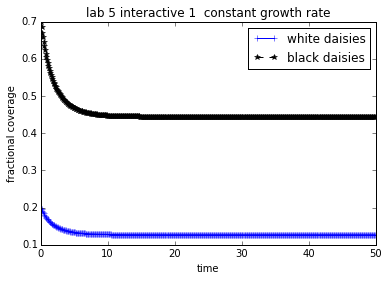

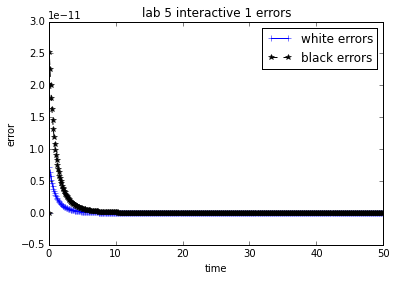

In [44]:
different_cond('lab5/fixed_growth.yaml')

Intiail condition for white daisies:0.4
Intiail condition for black daisies:0.35

Growth rate for black daisies: 0.7
Growth rate for white daisies: 0.7

Death rate: 0.3


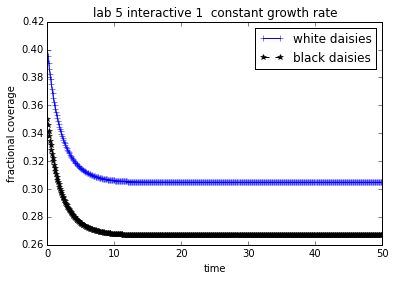

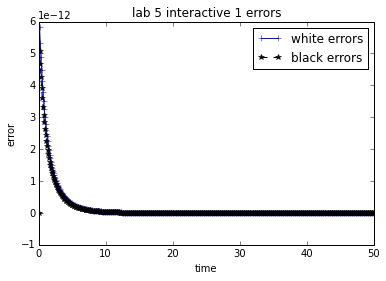

In [45]:
different_cond('lab5/fixed_growth_assignment.yaml')

**part 2**.For a given set of initial conditions try various growth rates. In
    particular, try rates that are both greater than and less than the
    death rate.


**Different growth rate** (greater than death rate)

Intiail condition for white daisies:0.2
Intiail condition for black daisies:0.7

Growth rate for black daisies: 0.4
Growth rate for white daisies: 0.5

Death rate: 0.3


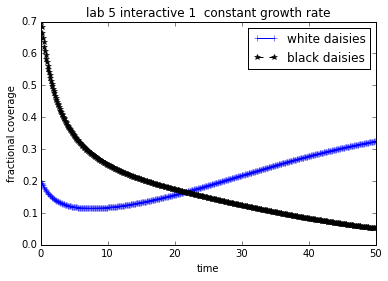

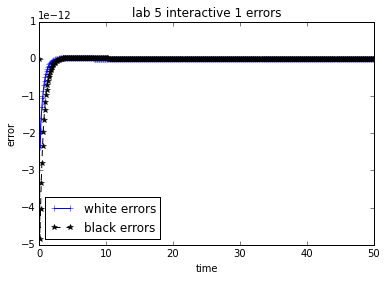

In [54]:
beta_b = 0.4  # growth rate for black daisies
beta_w = 0.5  # growth rate for white daisies
different_cond('lab5/fixed_growth.yaml')

**Different growth rate** (smaller than death rate)

Intiail condition for white daisies:0.2
Intiail condition for black daisies:0.7

Growth rate for black daisies: 0.1
Growth rate for white daisies: 0.1

Death rate: 0.3


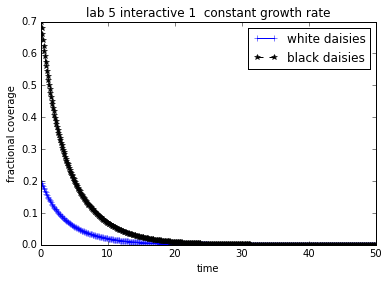

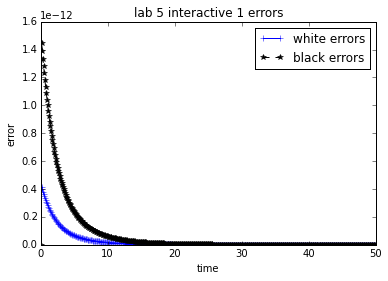

In [48]:
beta_b = 0.1  # growth rate for black daisies
beta_w = 0.1  # growth rate for white daisies
different_cond('lab5/fixed_growth.yaml')

**part 3**.Can you determine when non-zero steady states are achieved? Explain.

**Non-zero steady states are achieved** when $\frac{dy}{dt}=0$, which means the polulation of Daisy is not changing with time.

<a name="prob_coupling"></a>

# Problem Coupling
Consider daisies with the same albedo as the
planet, i.e. ’grey’ or neutral daisies, as specified in derivs5 routine
below.  

In [136]:
import numlabs.lab5.lab5_funs
from numlabs.lab5.lab5_funs import Integrator
from importlib import reload
reload(numlabs.lab5.lab5_funs)
from collections import namedtuple
import numpy as np
import matplotlib.pyplot as plt
yy=[]

class IntegCoupling(Integrator):
    """rewrite the init and derivs5 methods to
       work with a single (grey) daisy
    """

    def set_yinit(self):
        #
        # read in 'albedo_grey chi S0 L  R albedo_ground'
        #
        uservars = namedtuple('uservars', self.config['uservars'].keys())
        self.uservars = uservars(**self.config['uservars'])
        #
        # read in 'greyconc'
        #
        initvars = namedtuple('initvars', self.config['initvars'].keys())
        self.initvars = initvars(**self.config['initvars'])
        self.yinit = np.array([self.initvars.greyconc])
        self.nvars = len(self.yinit)
        return None

    def __init__(self, coeffFileName):
        super().__init__(coeffFileName)
        self.set_yinit()

    def derivs5(self, y, t):
        """
           Make the growth rate depend on the ground temperature
           using the quadratic function of temperature

           y[0]=fraction grey daisies
           t = time
           returns f[0] = dy/dt
        """
        global i
        sigma = 5.67e-8  # Stefan Boltzman constant W/m^2/K^4
        user = self.uservars
        x = 1.0 - y[0]
        albedo_p = x * user.albedo_ground + y[0] * user.albedo_grey
        Te_4 = user.S0 / 4.0 * userL * (1.0 - albedo_p) / sigma
        eta = user.R * user.S0 / (4.0 * sigma)
        temp_y = (eta * (albedo_p - user.albedo_grey) + Te_4)**0.25
        
        temp_b = (eta * (albedo_p - user.albedo_black) + Te_4)**0.25
        temp_w = (eta * (albedo_p - user.albedo_white) + Te_4)**0.25

        if i==0:
            btemp.append(temp_b)
            wtemp.append(temp_w)
            ltemp.append(temp_y)
            dtemp.append(Te_4**0.25)
            i=i+1
        #from sympy import Eq, var, solve
        #var('L')    
        #eq = Eq((eta * (albedo_p - user.albedo_grey) + user.S0 / 4.0 * L * (1.0 - albedo_p) / sigma)**0.25, 300)
        #print(solve(eq))
        
        if(temp_y >= 277.5 and temp_y <= 312.5):
            beta_y = 1.0 - 0.003265 * (295.0 - temp_y)**2.0
        else:
            beta_y = 0.0

        # create a 1 x 1 element vector to hold the derivative
        f = np.empty([self.nvars], np.float64)
        f[0] = y[0] * (beta_y * x - user.chi)
        return f

**part 1**.  For the current value of L (0.2) in the file coupling.yaml, 
    the final daisy steady state is zero.
    Why is it zero?

When L=0.2, the local temperature does not reach  275K. According to the image in cell[142], we know the growth rate, $\beta_{y}$, is going to be zero. Therefore, the final daisies state will be zero.

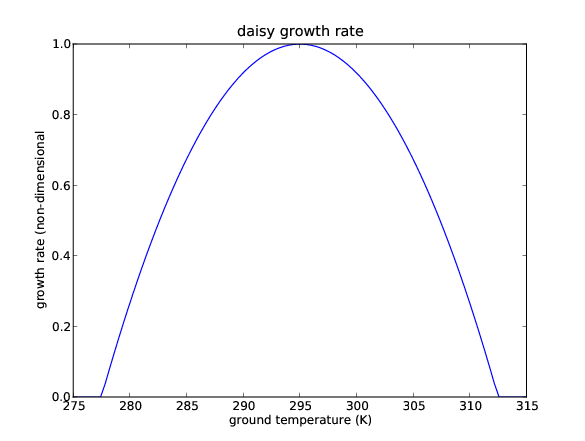

In [142]:
from IPython.display import Image
Image(filename="images/beta.png")

**part2.**  Find a value of L which leads to a non-zero steady state.

According to cell [129], we can see when L is in the range of (0.6,1.0), the daisy will reach a non-zero state because the temperture would be neither too warm nor too cold to grow. Therefore, I chose L=0.7 to make the non-zero plot (shown in cell [135]).

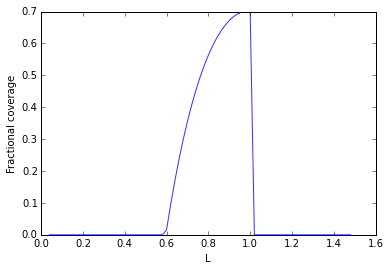

In [129]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
ltemp=[]
dtemp=[]
btemp=[]
wtemp=[]
y=[]
L=[]
for userL in (float(j)/100 for j in range (4,150,2)):
    i=0
    theSolver = IntegCoupling('lab5/coupling_assignment.yaml')
    timeVals, yVals, errorList = theSolver.timeloop5fixed()
    L.append(userL)
    y.append(yVals[-1])
thefig, theAx = plt.subplots(1, 1)
theLines = theAx.plot(L,y,alpha=0.8)
plt.xlabel('L')
plt.ylabel('Fractional coverage')

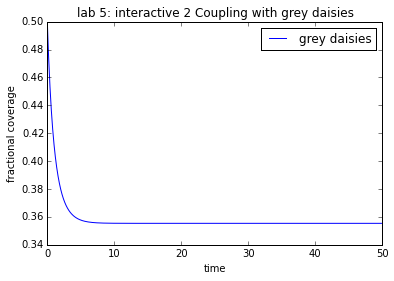

In [135]:
userL=0.7
theSolver = IntegCoupling('lab5/coupling.yaml')
timeVals, yVals, errorList = theSolver.timeloop5fixed()

thefig, theAx = plt.subplots(1, 1)
theLines = theAx.plot(timeVals, yVals)
theAx.set_title('lab 5: interactive 2 Coupling with grey daisies')
theAx.set_xlabel('time')
theAx.set_ylabel('fractional coverage')
out=theAx.legend(theLines, ('grey daisies',), loc='best')

**part 3**.What happens to the emission temperature as L is varied?  Make a plot of
    $L$ vs. $T_E$ for 10-15 values of $L$.  
    
According to cell [137], we can see if L is getting larger, the $T_E$ will go up as well.

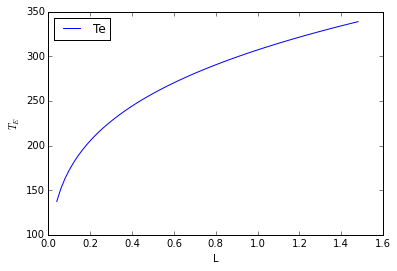

In [137]:
thefig, theAx = plt.subplots(1, 1)
theLines = theAx.plot(L, dtemp,label='Te')
theAx.legend(loc='best')
plt.xlabel('L')
plt.ylabel('$T_E$')

**part 4**.Do you see any difference between the daisy temperature and emission
    temperature? Plot both and explain. 
    
    
According to cell [138], we can see the emission temperature is higher than the white daisy temperature and lower than the black daisy temperature. We can say the emission temperture is a combination of daisy temperature.

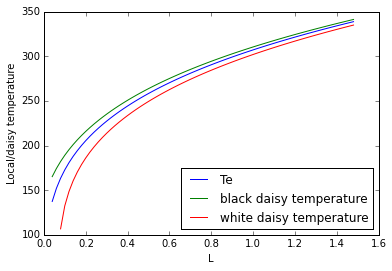

In [138]:
thefig, theAx = plt.subplots(1, 1)
theLines = theAx.plot(L, dtemp,label='Te')
theLines2 = theAx.plot(L, btemp,label='black daisy temperature')
theLines2 = theAx.plot(L, wtemp,label='white daisy temperature')
theAx.legend(loc='best')
plt.xlabel('L')
plt.ylabel('Local/daisy temperature')

**part 5**.How (i.e. thorugh what mechanism) does the makeup of the  global daisy population 
    affect the local temperature?
    
Assume all the initial conditons (except for the makeup of the daisy population) are the same , we will see if the black daisy dominates, the emission temperature will become higher leading the local temperature goes up. But if the white daisy dominates, the emission temperature will lower than that with higher black daisy concentration, which means the emission temperature will therefore lower. 

Since the local temperature and the emission temperature have a positive relation, $temp_y = (eta * (albedo_p - user.albedo_grey) + Te^{4})^{0.25}$, the makeup of the global daisy population will change the local temperature by adjusting the emission temperature.

<a name="prob_initial"></a>

# Problem initial:

The feedback means a stable daisy population (a
steady state) and the environmental conditions are in a delicate
balance. The code below produces a steady state which arises from a given initial daisy
population,

In [169]:
import numlabs.lab5.lab5_funs
from importlib import reload
reload(numlabs.lab5.lab5_funs)
from numlabs.lab5.lab5_funs import Integrator
from collections import namedtuple
import numpy as np


class Integ54(Integrator):

    def set_yinit(self):
        #
        # read in 'albedo_white chi S0 L albedo_black R albedo_ground'
        #
        uservars = namedtuple('uservars', self.config['uservars'].keys())
        self.uservars = uservars(**self.config['uservars'])
        #
        # read in 'whiteconc blackconc'
        #
        initvars = namedtuple('initvars', self.config['initvars'].keys())
        self.initvars = initvars(**self.config['initvars'])
        self.yinit = np.array(
            [self.initvars.whiteconc, self.initvars.blackconc])
        self.nvars = len(self.yinit)
        return None

    def __init__(self, coeff_file_name):
        super().__init__(coeff_file_name)
        self.set_yinit()

    def find_temp(self, yvals):
        """
            Calculate the temperatures over the white and black daisies
            and the planetary equilibrium temperature given the daisy fractions
            
            input:  yvals -- array of dimension [2] with the white [0] and black [1]
                    daisy fractiion
            output:  white temperature (K), black temperature (K), equilibrium temperature (K)
        """
        sigma = 5.67e-8  # Stefan Boltzman constant W/m^2/K^4
        user = self.uservars
        bare = 1.0 - yvals[0] - yvals[1]
        albedo_p = bare * user.albedo_ground + \
            yvals[0] * user.albedo_white + yvals[1] * user.albedo_black
        Te_4 = user.S0 / 4.0 * user.L * (1.0 - albedo_p) / sigma
        temp_e = Te_4**0.25
        eta = user.R * user.S0 / (4.0 * sigma)
        temp_b = (eta * (albedo_p - user.albedo_black) + Te_4)**0.25
        temp_w = (eta * (albedo_p - user.albedo_white) + Te_4)**0.25
        return (temp_w, temp_b, temp_e)

    def derivs5(self, y, t):
        """y[0]=fraction white daisies
           y[1]=fraction black daisies
           no feedback between daisies and
           albedo_p (set to ground albedo)
        """
        temp_w, temp_b, temp_e = self.find_temp(y)
        
        if(temp_b >= 277.5 and temp_b <= 312.5):
            beta_b = 1.0 - 0.003265 * (295.0 - temp_b)**2.0
        else:
            beta_b = 0.0
  
        if(temp_w >= 277.5 and temp_w <= 312.5):
            beta_w = 1.0 - 0.003265 * (295.0 - temp_w)**2.0
        else:
            beta_w = 0.0
        global i
        #if i==0:
        btemp.append(temp_b)
        wtemp.append(temp_w)
        bbeta.append(beta_b)
        wbeta.append(beta_w)
        i=i+1
    
        user = self.uservars
        bare = 1.0 - y[0] - y[1]
        # create a 1 x 2 element vector to hold the derivitive
        #print (temp_w)
        f = np.empty_like(y)
        #f[0]=temp_w
        #f[1]=temp_b
        #f[0]=beta_w
        #f[1]=beta_b
        f[0] = y[0] * (beta_w * bare - user.chi)
        f[1] = y[1] * (beta_b * bare - user.chi)
        #global b
        #b =np.empty_like(y)
        #b[0]=temp_w
        #b[1]=temp_b
        
        return f


**part 1**.  Add a small initial fraction of black daisies (say, 0.01) to the 
    value in initial.yaml and see
    what effect this has on the temperature and final daisy populations.
    Do you still have a final non-zero daisy population?
    
The temperature higher and we will have a non-zero daisy population/

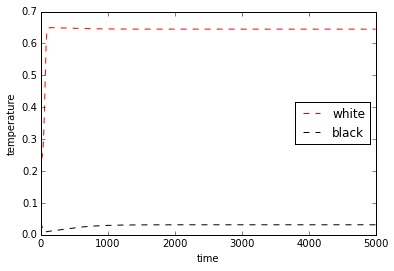

In [147]:
wbeta=[]
bbeta=[]
btemp=[]
wtemp=[]
userL=0.8
i=0
import pandas as pd
theSolver = Integ54('lab5/initial_assignment.yaml')
timevals, yvals, errorlist = theSolver.timeloop5fixed()
daisies = pd.DataFrame(yvals, columns=['white', 'black'])
thefig, theAx = plt.subplots(1, 1)
line1, = theAx.plot(daisies['white'])
line2, = theAx.plot(daisies['black'])
line1.set(linestyle='--', color='r', label='white')
line2.set(linestyle='--', color='k', label='black')
theAx.set_xlabel('time')
theAx.set_ylabel('temperature')
out=theAx.legend(loc='center right')
#plt.xlim([0,500])
plt.show()

**part 2**.  Attempt to adjust the initial white daisy population to obtain a
    non-zero steady state. Do you have to increase or decrease the
    initial fraction? What is your explanation for this behavior?
    
Assuming initial condition of black daisy stays the same, say 0.04, the way to find a non-zero state is to increase the initial condition of white daisy. The possible reason would be if the there are too little white flowers, the groung temperature may go too high for the black and white flowers to live. According to the figure in cell [167], we can see if the initial condition of black daisy is 0.04, the white daisy has to be higher than 0.2 to have a non-zero state. 

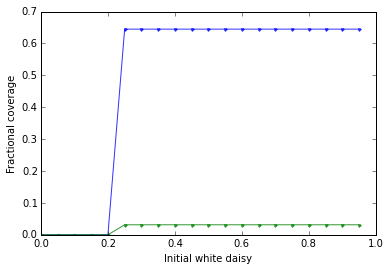

In [167]:
L=[]
y=[]
#whiteconc=0.24
blackconc=0.04
for whiteconc in (float(j)/100 for j in range (0,100,5)):
    i=0
    theSolver = Integ54('lab5/initial_assignment.yaml')
    timeVals, yVals, errorList = theSolver.timeloop5fixed()
    L.append(whiteconc)
    y.append(yVals[-1])
thefig, theAx = plt.subplots(1, 1)
theLines = theAx.plot(L,y,'.-',alpha=0.8)
plt.xlabel('Initial white daisy')
plt.ylabel('Fractional coverage')
plt.show()

    In this figure, blue line stands for the population of white daisy and the green line means the black daisy.

**part 3**.  Experiment with other initial fractions of daisies and look for
    non-zero steady states.
    
In this part, I played around with initical fractions of black daisies. In this case, I set initial condition of white daisy into 0.5. (I set it high otherwise the ground will be too hot for daisies.) From cell [168], we can clearly see that if the black flower is more than 35%, both the white and black flowers would die. The possible explaination is still related to temperature. If there are too many black daisies, the albedo will be low and the local temperature would become too hot to plant daisies.

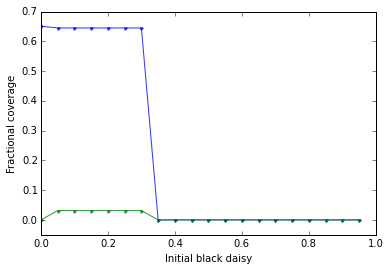

In [168]:
L=[]
y=[]
whiteconc=0.5
#blackconc=0.04
for blackconc in (float(j)/100 for j in range (0,100,5)):
    i=0
    theSolver = Integ54('lab5/initial_assignment.yaml')
    timeVals, yVals, errorList = theSolver.timeloop5fixed()
    L.append(blackconc)
    y.append(yVals[-1])
thefig, theAx = plt.subplots(1, 1)
theLines = theAx.plot(L,y,'.-',alpha=0.8)
plt.xlabel('Initial black daisy')
plt.ylabel('Fractional coverage')
plt.ylim([-0.05,0.7])
plt.show()

    In this figure, blue line stands for the population of white daisy and the green line means the black daisy.

<a name="prob_temperature"></a>
# Problem Temperature:

(1)The code above adds a new method, ```find_temp``` that takes the white/black daisy fractions and calculates local and planetary temperatures.

**(2) Make plots** of (temp_w, temp_b) and (beta_w, beta_b) vs. time for a case with non-zero equilibrium
   concentrations of both black and white daisies.
   
   I chose whiteconc=0.24, blackconc=0.04 to make the plot. See cell [170] and [171].

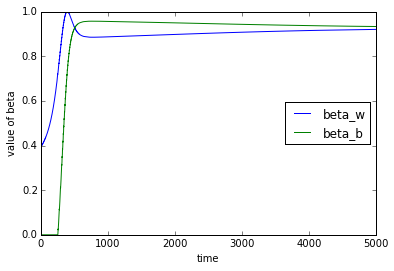

In [170]:
%matplotlib inline
import matplotlib.pyplot as plt
time
thefig, theAx = plt.subplots(1, 1)
line1, = theAx.plot(wbeta,label='beta_w')
line1, = theAx.plot(bbeta,label='beta_b')
plt.xlim([0,5000])
plt.xlabel('time')
plt.ylabel('value of beta')
plt.legend(loc='center right')
plt.show()

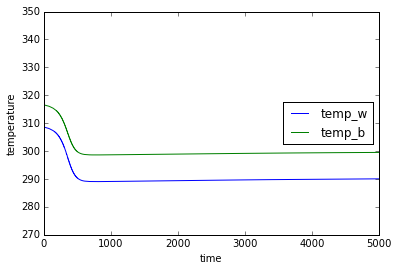

In [171]:
thefig, theAx = plt.subplots(1, 1)
line1, = theAx.plot(wtemp,label='temp_w')
line1, = theAx.plot(btemp,label='temp_b')
plt.xlim([0,5000])
plt.xlabel('time')
plt.ylabel('temperature')
plt.legend(loc='center right')
plt.show()

<a name="prob_estimate"></a>

# Problem Estimate:

In the demo below, compare the error estimate to
the true error, on the initial value problem from ,

$$\frac{dy}{dt} = -y +t +1,  \;\;\;\; y(0) =1$$ 

which has the exact
solution 

$$y(t) = t + e^{-t}$$

In [1]:
import numlabs.lab5.lab5_funs
from importlib import reload
reload(numlabs.lab5.lab5_funs)
from numlabs.lab5.lab5_funs import Integrator
from collections import namedtuple
import numpy as np


class Integ55(Integrator):

    def set_yinit(self):
        #
        # read in 'c1 c2 c3'
        #
        uservars = namedtuple('uservars', self.config['uservars'].keys())
        self.uservars = uservars(**self.config['uservars'])
        #
        # read in initial yinit
        #
        initvars = namedtuple('initvars', self.config['initvars'].keys())
        self.initvars = initvars(**self.config['initvars'])
        self.yinit = np.array([self.initvars.yinit])
        self.nvars = len(self.yinit)
        print ('initial condition: y=%s'%self.yinit)
        #print ('time step:dt=%s'%self.uservars)
        return None

    def __init__(self, coeff_file_name):
        super().__init__(coeff_file_name)
        self.set_yinit()

    def derivs5(self, y, theTime):
        """
           y[0]=fraction white daisies
        """
        
        user=self.uservars
        f=np.empty_like(self.yinit)
        f[0]=user.c1*y[0] + user.c2*theTime + user.c3;
        #print ('time step:dt=%s'%user.dt)
        return f

In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def plot(filename):
    theSolver=Integ55(filename)

    timeVals,yVals,yErrors =theSolver.timeloop5Err()
    timeVals=np.array(timeVals)
    print ('final time: %s'%timeVals[-1])
    exact=timeVals + np.exp(-timeVals)
    yVals=np.array(yVals)
    yVals=yVals.squeeze()
    yErrors=np.array(yErrors)
    
    theFig=plt.figure(figsize=(18,5))
    theAx=theFig.add_subplot(141)
    line1=theAx.plot(timeVals,yVals,label='adapt')
    line2=theAx.plot(timeVals,exact,'r+',label='exact')
    theAx.set_title('Solution (adaptive step)')
    theAx.set_xlabel('time')
    theAx.set_ylabel('y value')
    theAx.legend(loc='center right')

#
# we need to unpack yvals (a list of arrays of length 1
# into an array of numbers using a list comprehension
#

    theAx=theFig.add_subplot(142)
    realestError = yVals - exact
    actualErrorLine=theAx.plot(timeVals,realestError,label='actual error')
    estimatedErrorLine=theAx.plot(timeVals,yErrors,label='estimated error')
    theAx.set_title('Errors (adaptive step)')
    theAx.legend(loc='best')


    timeVals,yVals,yErrors =theSolver.timeloop5fixed()

    np_yVals=np.array(yVals).squeeze()
    yErrors=np.array(yErrors)
    np_exact=timeVals + np.exp(-timeVals)
    print ('fixed time step:dt=%s'%(timeVals[1]-timeVals[0]))


    theAx=theFig.add_subplot(143)
    line1=theAx.plot(timeVals,np_yVals,label='fixed')
    line2=theAx.plot(timeVals,np_exact,'r+',label='exact')
    theAx.set_title('Solution (fixed step)')
    theAx.set_xlabel('time')
    theAx.set_ylabel('y value')
    theAx.legend(loc='center right')

    theAx=theFig.add_subplot(144)
    realestError = np_yVals - np_exact
    actualErrorLine=theAx.plot(timeVals,realestError,label='actual error')
    estimatedErrorLine=theAx.plot(timeVals,yErrors,label='estimated error')
    theAx.legend(loc='best')
    theAx.set_title('Errors (fixed step)')


**part 1**.  Play with the time step and final time, attempting small changes at
    first. How reasonable is the error estimate?
    
Compared with cell[7], cell [8] changed its time step from 0.2 to 0.1. And again, comapared with cell[7], cell [9] changed its final time from 500 to 50. 

Those error estimates all look reasonable to me. For the fixed time step, when the time step decreases, the error decreased as well. As for the one with adaptive time step, the error is oscillated all the time, which correspond to the size of time step. This oscillation made sense to me because when the error is too small, the method will make the time step bigger so that it can reduce the computational cost and while the time step is too larger, the method will narrow the time step so that the error is still in control, which caused the error jumped back and forth but still in an acceptable range.


**part 2**.  Keep decreasing the time step. Does the error estimate diverge from
    the computed error? Why?

Compared with cell[7], cell [8] decreased its time step from 0.2 to 0.1. For the fixed time step , the error doesn't diverge because time step is small enough and this method is also stable for this case. As for the adaptive one, the error diverged a little bit because of the error accumulation, but its still in an acceptable range.

**part 3**.  Keep increasing the time step. Does the error estimate diverge? What
    is happening with the numerical solution?
    
Compared with cell[7], cell [15] increased its time step from 0.2 to 5.  For the fixed time step, the errors diverge significantly. And the one with adaptive time step is slightly diverging but still stable. 

So when the numerical scheme is applied, the difference between the actual solution and the numerical approximation to the solution is accumulating step by step. So the error will definitely diverge from the computed error but if the method is stable, the error will still be in control. And if the method is unstable, the error will jump (cell [15] is an good example).

initial condition: y=[ 1.]
final time: 497.536851387
fixed time step:dt=0.2


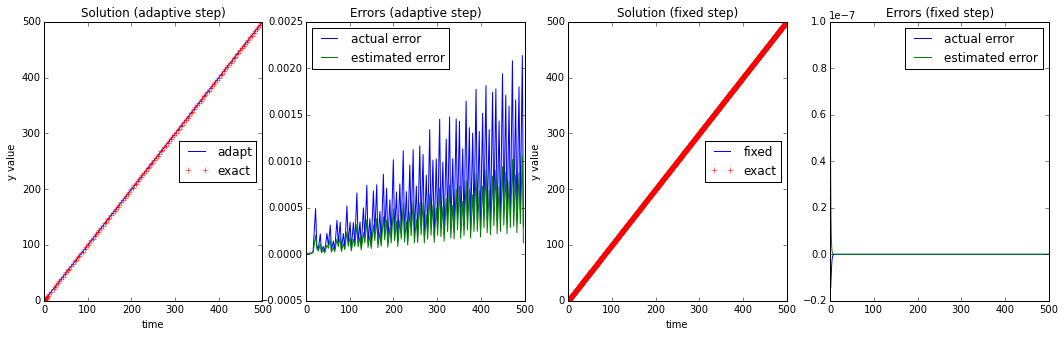

In [7]:
plot('lab5/expon.yaml')

initial condition: y=[ 1.]
final time: 496.094011891
fixed time step:dt=0.1


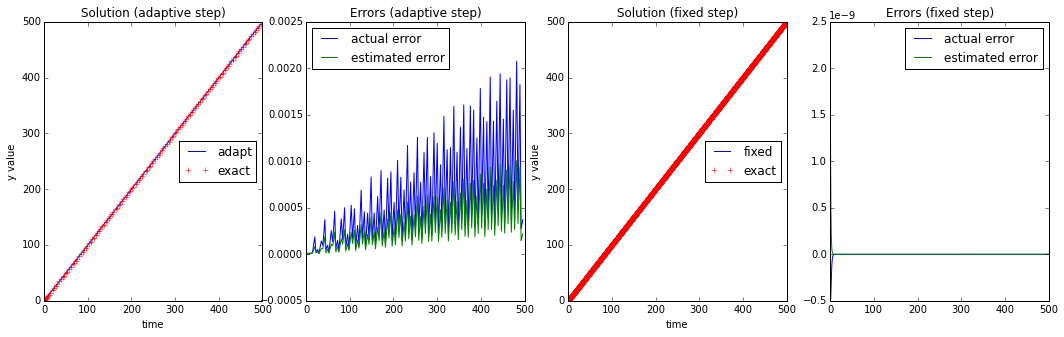

In [8]:
plot('lab5/expon_assignment2.yaml')

initial condition: y=[ 1.]
final time: 47.3248073079
fixed time step:dt=0.2


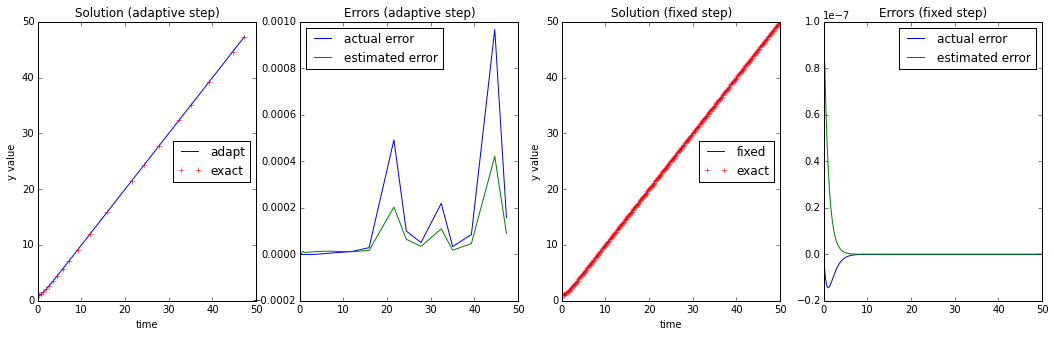

In [9]:
plot('lab5/expon_assignment.yaml')

initial condition: y=[ 1.]
final time: 497.652569373
fixed time step:dt=5.0


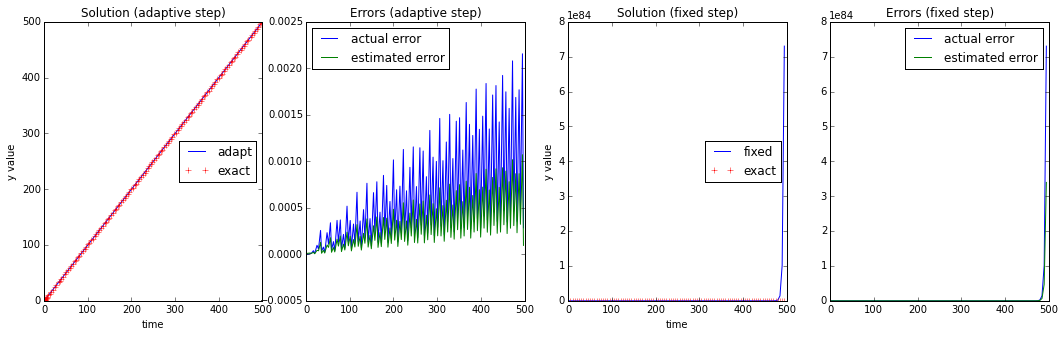

In [15]:
plot('lab5/expon_assignment3.yaml')

<a name="prob_adaptive"></a>

# Problem adaptive:

The demos in the previous section, solved the
Daisyworld equations using the embedded Runge-Kutta methods with
adaptive timestep control. 

In [41]:
import numlabs.lab5.lab5_funs
from importlib import reload
reload(numlabs.lab5.lab5_funs)
from numlabs.lab5.lab5_funs import Integrator
from collections import namedtuple
import numpy as np


class Integ54(Integrator):

    def set_yinit(self):
        #
        # read in 'albedo_white chi S0 L albedo_black R albedo_ground'
        #
        uservars = namedtuple('uservars', self.config['uservars'].keys())
        self.uservars = uservars(**self.config['uservars'])
        #
        # read in 'whiteconc blackconc'
        #
        initvars = namedtuple('initvars', self.config['initvars'].keys())
        self.initvars = initvars(**self.config['initvars'])
        self.yinit = np.array(
            [self.initvars.whiteconc, self.initvars.blackconc])
        self.nvars = len(self.yinit)
        return None

    def __init__(self, coeff_file_name):
        super().__init__(coeff_file_name)
        self.set_yinit()

    def find_temp(self, yvals):
        """
            Calculate the temperatures over the white and black daisies
            and the planetary equilibrium temperature given the daisy fractions
            
            input:  yvals -- array of dimension [2] with the white [0] and black [1]
                    daisy fractiion
            output:  white temperature (K), black temperature (K), equilibrium temperature (K)
        """
        sigma = 5.67e-8  # Stefan Boltzman constant W/m^2/K^4
        user = self.uservars
        bare = 1.0 - yvals[0] - yvals[1]
        albedo_p = bare * user.albedo_ground + \
            yvals[0] * user.albedo_white + yvals[1] * user.albedo_black
        Te_4 = user.S0 / 4.0 * user.L * (1.0 - albedo_p) / sigma
        temp_e = Te_4**0.25
        eta = user.R * user.S0 / (4.0 * sigma)
        temp_b = (eta * (albedo_p - user.albedo_black) + Te_4)**0.25
        temp_w = (eta * (albedo_p - user.albedo_white) + Te_4)**0.25
        return (temp_w, temp_b, temp_e)

    def derivs5(self, y, t):
        """y[0]=fraction white daisies
           y[1]=fraction black daisies
           no feedback between daisies and
           albedo_p (set to ground albedo)
        """
        temp_w, temp_b, temp_e = self.find_temp(y)
        
        if(temp_b >= 277.5 and temp_b <= 312.5):
            beta_b = 1.0 - 0.003265 * (295.0 - temp_b)**2.0
        else:
            beta_b = 0.0
  
        if(temp_w >= 277.5 and temp_w <= 312.5):
            beta_w = 1.0 - 0.003265 * (295.0 - temp_w)**2.0
        else:
            beta_w = 0.0
    
        user = self.uservars
        bare = 1.0 - y[0] - y[1]
        # create a 1 x 2 element vector to hold the derivitive
        #print (temp_w)
        f = np.empty_like(y)
        f[0] = y[0] * (beta_w * bare - user.chi)
        f[1] = y[1] * (beta_b * bare - user.chi)
        
        return f


**part 1**.  Run the code and find solutions of Daisyworld with the default
    settings found in adapt.yaml using the timeloop5Err adaptive
    code

This part is shown in cell [89]. It only ran 24 time step. The duration is 0.004857540130615234 seconds.
    
**part 2**.  Find the solutions again but this time with fixed stepsizes and
    compare the size of the timesteps and number of the timesteps.

This part is shown in cell [88].  The time step was 500! Its duration is 0.05899381637573242 seconds.
    
**part 3**.  How much faster does the fixed timeloop need to be to give the
    same performance as the adaptive timeloop for this case?

The one with adaptive time step is approximately 12 times faster.


Duration: 0.004857540130615234 seconds
Number of points:24


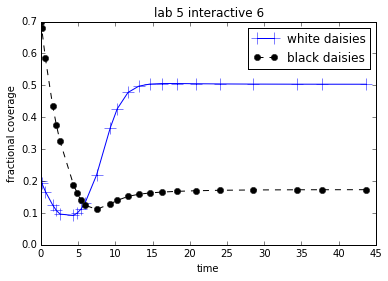

In [89]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

theSolver=Integ54('lab5/adapt.yaml')
import time
start_time = time.time()
timeVals,yVals,errorList=theSolver.timeloop5Err()
print("Duration: %s seconds" % (time.time() - start_time))
yvals=pd.DataFrame.from_records(yVals,columns=['white','black'])

thefig,theAx=plt.subplots(1,1)
points,=theAx.plot(timeVals,yvals['white'],'-b+',label='white daisies')
points.set_markersize(12)
theLine1,=theAx.plot(timeVals,yvals['black'],'--ko',label='black daisies')
theAx.set_title('lab 5 interactive 6')
theAx.set_xlabel('time')
theAx.set_ylabel('fractional coverage')
out=theAx.legend(loc='best')

print('Number of points:%s'%(timeVals.shape))

Duration: 0.05899381637573242 seconds
Number of points:500


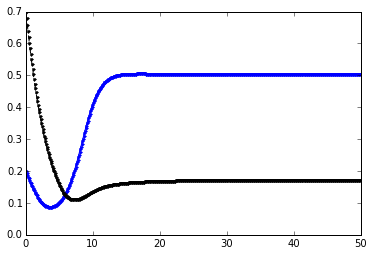

In [88]:
start_time = time.time()
timeVals,yVals,errorList=theSolver.timeloop5fixed()
print("Duration: %s seconds" % (time.time() - start_time))
plt.plot(timeVals,yVals[:,0],marker='.',label='white daisies')
plt.plot(timeVals,yVals[:,1],'k--',marker='.',label='black daisies')
print('Number of points:%s'%(timeVals.shape))
theAx.set_xlabel('time')
theAx.set_ylabel('fractional coverage')
out=theAx.legend(loc='best')
plt.show()

<a name="prob_predator"></a>

# Problem Predator:

To make life a little more interesting on
Daisyworld, add a population of rabbits that feed upon the daisies. The
rabbit birth rate will be proportional to the area covered by the
daisies while, conversely, the daisy *death rate* will be
proportional to the rabbit population.

Add another equation to the Daisyworld model which governs the rabbit
population and make the appropriate modifications to the existing daisy
equations. Modify the set of equations and solve it with the Runge-Kutta
method with adaptive timesteps. Use it to look for steady states and to
determine their dependence on the initial conditions and model
parameters.

In [88]:
global whiteconc
global blackconc
global r
global grow
global dead
global L

import numlabs.lab5.lab5_funs
from importlib import reload
reload(numlabs.lab5.lab5_funs)
from numlabs.lab5.lab5_funs import Integrator
from collections import namedtuple
import numpy as np

class Integ54(Integrator):
    def set_yinit(self):
        uservars = namedtuple('uservars', self.config['uservars'].keys())
        self.uservars = uservars(**self.config['uservars'])
        initvars = namedtuple('initvars', self.config['initvars'].keys())
        self.initvars = initvars(**self.config['initvars'])
        self.yinit = np.array(
            [whiteconc,blackconc])
        self.nvars = len(self.yinit)
        return None

    def __init__(self, coeff_file_name):
        super().__init__(coeff_file_name)
        self.set_yinit()

    def find_temp(self, yvals):
        sigma = 5.67e-8
        user = self.uservars
        bare = 1.0 - yvals[0] - yvals[1]
        albedo_p = bare * user.albedo_ground + \
            yvals[0] * user.albedo_white + yvals[1] * user.albedo_black
        Te_4 = user.S0 / 4.0 * L * (1.0 - albedo_p) / sigma
        temp_e = Te_4**0.25
        eta = user.R * user.S0 / (4.0 * sigma)
        temp_b = (eta * (albedo_p - user.albedo_black) + Te_4)**0.25
        temp_w = (eta * (albedo_p - user.albedo_white) + Te_4)**0.25
        return (temp_w, temp_b, temp_e)

    def derivs5(self, y, rvals,t):
        r = self.rabbit(y,rvals)
        temp_w, temp_b, temp_e = self.find_temp(y)
        if(temp_b >= 277.5 and temp_b <= 312.5):
            beta_b = 1.0 - 0.003265 * (295.0 - temp_b)**2.0
        else:
            beta_b = 0.0
        if(temp_w >= 277.5 and temp_w <= 312.5):
            beta_w = 1.0 - 0.003265 * (295.0 - temp_w)**2.0
        else:
            beta_w = 0.0
        user = self.uservars
        bare = 1.0 - y[0] - y[1]
        f = np.empty_like(y)
        f[0] = y[0] * (beta_w * bare - user.chi - r)
        f[1] = y[1] * (beta_b * bare - user.chi - r)
        return {'f':f,'r':r}
    
    def rabbit(self,yvals,rval):
        user = self.uservars
        beta_r = (yvals[0]+yvals[1])*grow
        r = beta_r*(rval)-dead
        return r
    
    def rkckODE5(self, yold, rold, timeStep, deltaT):
        a, c1, c2, b = self.rkckConsts
        i = self.initvars
        derivArray = np.empty([6, self.nvars], 'float')
        ynext = np.zeros_like(yold)
        bsum = np.zeros_like(yold)
        estError = np.zeros_like(yold)
        derivArray[0, :] = self.derivs5(yold,rold, timeStep)['f'][:]
        r = rold
        y = yold
        for i in np.arange(5):
            bsum = 0.
            for j in np.arange(i + 1):
                bsum = bsum + b[i, j] * derivArray[j, :]
            derivArray[i + 1, :] = self.derivs5(y + deltaT * bsum, r, timeStep + a[i] * deltaT)['f'][:]
            r = self.derivs5(y + deltaT * bsum, r, timeStep + a[i] * deltaT)['r']
            estError = estError + c2[i] * derivArray[i, :]
            ynext = ynext + c1[i] * derivArray[i, :]
        y = y + deltaT * (ynext + c1[5] * derivArray[5, :])
        estError = deltaT * (estError + c2[5] * derivArray[5, :])
        timeStep = timeStep + deltaT
        return (y,r, estError, timeStep)
    
    def timeloop5Err(self):
        t = self.timevars
        a = self.adaptvars
        i = self.initvars
        nvars = self.nvars
        oldTime = t.tstart
        olddt = t.dt
        yold = self.yinit
        rold = 0.45
        yerror = np.zeros_like(yold)
        num = 0
        badsteps = 0
        goodsteps = 0
        timeVals = []
        yvals = []
        errorList = []
        rvals = []
        while(oldTime < t.tend):
            rvals.append(rold)
            timeVals.append(oldTime)
            yvals.append(yold)
            errorList.append(yerror)
            if(num > a.maxsteps):
                raise Exception('num > maxsteps')
            goodStep = False
            failSteps = 0
            while(not goodStep):
                if(failSteps > a.maxfail):
                    raise Exception('failSteps > a.maxfail')
                ynew, rnew, yerror, timeStep = self.rkckODE5(yold,rold, oldTime, olddt)
                errtest = 0.
                for i in range(nvars):
                    errtest = errtest + \
                        (yerror[i] / (a.atol + a.rtol * np.abs(ynew[i])))**2.0
                errtest = np.sqrt(errtest / nvars)

                dtchange = a.s * (1.0 / errtest)**0.2
                if (errtest > 3.0):

                    if(dtchange > a.dtfailmax):
                        olddt = a.dtfailmax * olddt
                    elif (dtchange < a.dtfailmin):
                        olddt = a.dtfailmin * olddt
                    else:
                        olddt = dtchange * olddt
                    if (timeStep + olddt == timeStep):
                        raise Exception('step smaller than machine precision')
                    failSteps = failSteps + 1
                    ynew = yold
                    rnew = rold
                    timeStep = oldTime
                else:
                    if (abs((1.0 - dtchange)) > a.dtpassmin):
                        if(dtchange > a.dtpassmax):
                            dtnew = a.dtpassmax * olddt
                        else:
                            dtnew = dtchange * olddt
                    else:
                        dtnew = olddt
                    goodStep = True
                    oldTime = timeStep
                    yold = ynew
                    rold = rnew
                    goodsteps = goodsteps + 1
                badsteps = badsteps + failSteps
            if(timeStep + dtnew > t.tend):
                olddt = t.tend - timeStep
            elif(timeStep + 2.0 * dtnew > t.tend):
                olddt = (t.tend - timeStep) / 2.0
            else:
                olddt = dtnew
        timeVals = np.array(timeVals).squeeze()
        yvals = np.array(yvals).squeeze()
        errorVals = np.array(errorList).squeeze()
        rvals = np.array(rvals).squeeze()
        self.timevals = timeVals
        self.yvals = yvals
        self.errorVals = errorVals
        return (timeVals, yvals,rvals, errorVals)

In [50]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

L=1.1
whiteconc = 0.4
blackconc = 0.5
def rabbit_in_daisy_world():
    theSolver=Integ54('lab5/adapt.yaml')
    timeVals,yVals,rVals,errorList=theSolver.timeloop5Err()
    yvals=pd.DataFrame.from_records(yVals,columns=['white','black'])

    thefig,theAx=plt.subplots(1,1)
    points,=theAx.plot(timeVals,yvals['white'],'-o',label='white daisies')
    theLine1,=theAx.plot(timeVals,yvals['black'],'-o',label='black daisies')
    theLine2,=theAx.plot(timeVals,rVals,'-^',label = 'rabbit')
    theAx.set_title('Rabbits run into Daisy world!')
    theAx.set_xlabel('time')
    theAx.set_ylabel('fractional coverage')
    out=theAx.legend(loc='best')

**part 1**.  Show your modified Daisyworld equations and your new integrator class.

The result was shown in cell [65]. 

**part 2**.  At least one set of parameter values and initial conditions that
    leads to the steady state and a plot of the timeseries for the daisies and rabbits.
    
The result was shown in cell [70]. 

In this case, I set the initial white and black daisy population to 0.4 and 0.5 respectively. The rabbit birth rate was set to be:

birthrate=$0.1(y_{white}+y_{black})$. And the rabite dead rate was equals to 0.3. 

**part 3**.  A discussion of the steady state’s dependence on these values, i.e.
    what happens when they are altered. Include a few plots for
    illustration.
    
(1)Birth rate

Compared to cell [70], I changed the coefficient before the birth rate of rabbits in cell [74], from 0.1 to 0.5, to see how this affects the final result. Birthrate=$coefficiet*(y_{white}+y_{black})$. 

We can see if the coefficient is high, which enabled the rabbit population to grow faster, the final population of daisy is lower. On the contrary, if the coefficient is low, the rabbit population will grow slowly leading to less daisy consumed and therefore the final population of the daisy will become higher.

(2)Death rate

Compared to cell [70], I set the dead rate of rabbit in cell[71] from 0.3 to 0. From cell[27], we can see the final population of daisies is less than the one in cell[70], because the rabbit population goes up and therefore there are more rabbits to consume the flowers.
    

birthrate=$0.1(y_{white}+y_{black})$


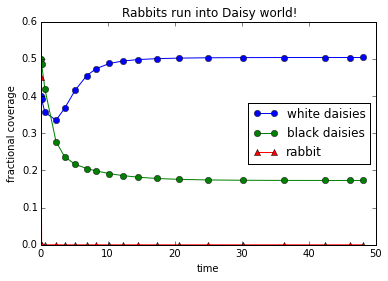

In [70]:
grow = 0.1
dead = 0.3
print ('birthrate=$0.1(y_{white}+y_{black})$')
rabbit_in_daisy_world()

birthrate=$0.5(y_{white}+y_{black})$


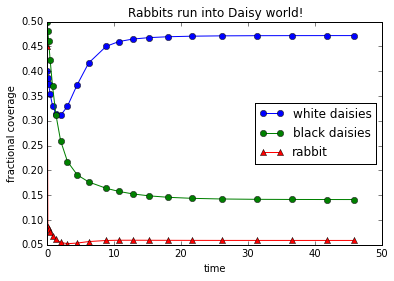

In [73]:
grow = 0.1
dead = 0.0
print ('birthrate=$0.5(y_{white}+y_{black})$')
rabbit_in_daisy_world()

birthrate=$0.5(y_{white}+y_{black})$


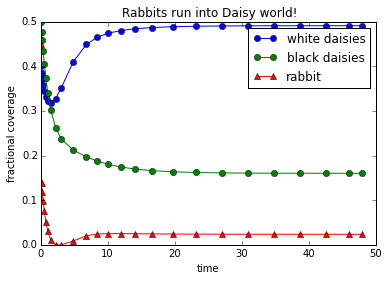

In [74]:
grow = 0.5
dead = 0.3
print ('birthrate=$0.5(y_{white}+y_{black})$')
rabbit_in_daisy_world()

**part 4**.  Does adding this feedback extend the range of habital L values  for which
    non-zero populations exist?  
    
The plot is shown in cell [35]. Adding this feedback does extend the range of habital L. Originally, when L is lower than 0.6 or higher than 1.0, the temperature is too lower or too high for the flower to grow (cell [142]). But now the L is extended to (0.6,1.3).

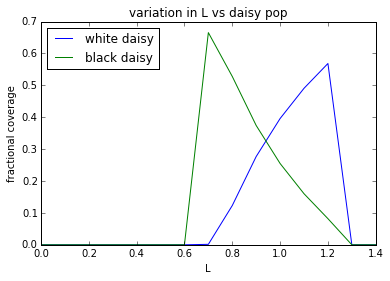

In [87]:
l_vals = []
wyval = []
byval = []
for L in (float(j)/100 for j in range (0,150,10)):
    theSolver = Integ54('lab5/adapt.yaml')
    timeVals, yVals,rVals ,errorList = theSolver.timeloop5Err()
    yvals=pd.DataFrame.from_records(yVals,columns=['white','black'])
    l_vals.append(L)
    wyval.append(yvals['white'][len(yvals)-1])
    byval.append(yvals['black'][len(yvals)-1])
    n+=1

thefig, theAx = plt.subplots(1, 1)
theLines = theAx.plot(l_vals, wyval,label = 'white daisy')
thelines1 = theAx.plot(l_vals,byval,label = 'black daisy')
theAx.set_title('variation in L vs daisy pop')
theAx.set_xlabel('L')
theAx.set_ylabel('fractional coverage')
out=theAx.legend( loc='best')